In [47]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
df = pd.read_excel('data_1.xlsx')

Нормализация данных и скалирование от -1 до 1

In [49]:
scaler = MinMaxScaler(feature_range=(-1, 1))
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

Обработка пропусков и выбросов

In [50]:
# Обработка пропусков
# Замените все пропущенные значения (NaN) на среднее значение по столбцу
df.fillna(df.mean(), inplace=True)

# Обработка выбросов
# Удалите все строки, которые содержат выбросы в любом из столбцов
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [51]:
df_normalized.head(10)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,-1.000000,-0.454545,0.461187,-0.980975,1.0,0.233883,0.438646,-0.448590
1,-0.995157,-0.454545,-0.109589,-0.912381,0.8,0.169898,0.422903,-0.370337
2,-0.990315,1.000000,-0.392694,-0.833370,0.0,0.342462,0.517792,-0.277525
3,-0.985472,0.818182,-0.392694,-0.833370,0.0,0.342462,0.517792,-0.141037
4,-0.980630,-0.636364,-0.771689,-0.886402,0.0,0.146389,0.486306,-0.353958
5,-0.975787,-1.000000,-0.675799,-0.334333,-0.4,-0.249152,-0.158723,-0.554140
6,-0.970944,-1.000000,0.575342,-0.814347,0.4,0.145419,0.356265,-0.404914
7,-0.966102,0.636364,-0.073059,-0.918257,0.2,0.171837,0.482640,-0.288444
8,-0.961259,0.818182,0.447489,0.698055,-0.8,-0.542414,-0.761699,-0.796178
9,-0.956416,0.636364,-0.182648,-0.455562,-0.4,-0.145904,-0.108691,-0.736124


Матрица корреляции

In [52]:
corr_matrix = df.corr()

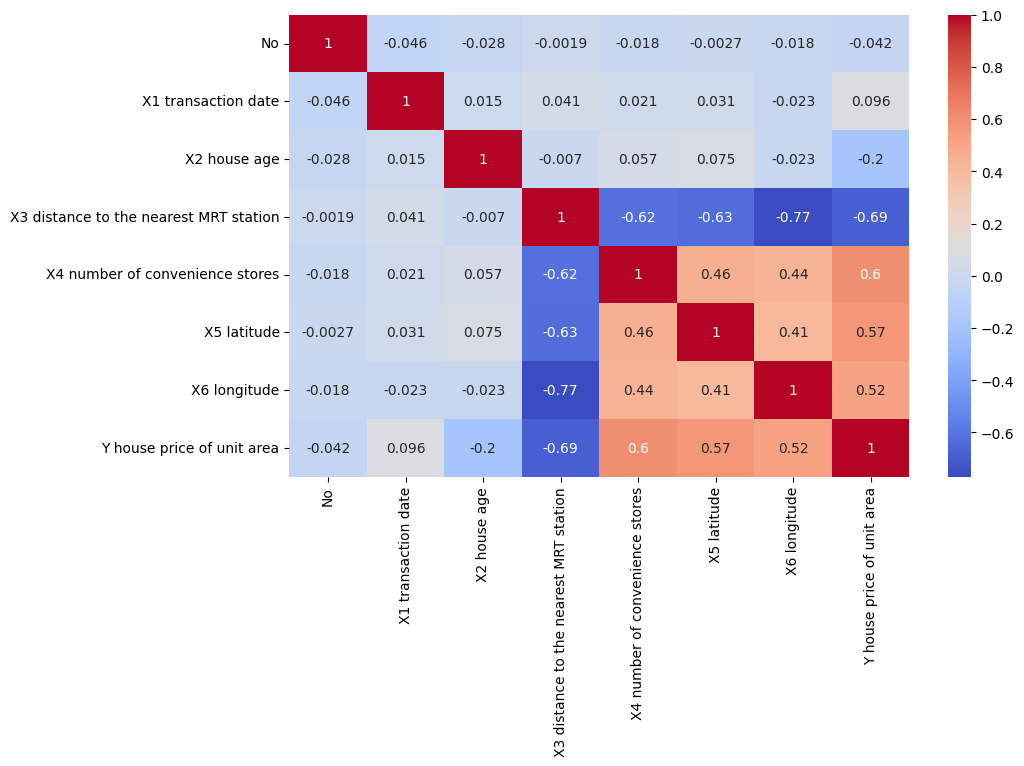

In [53]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Гистограммы распределения

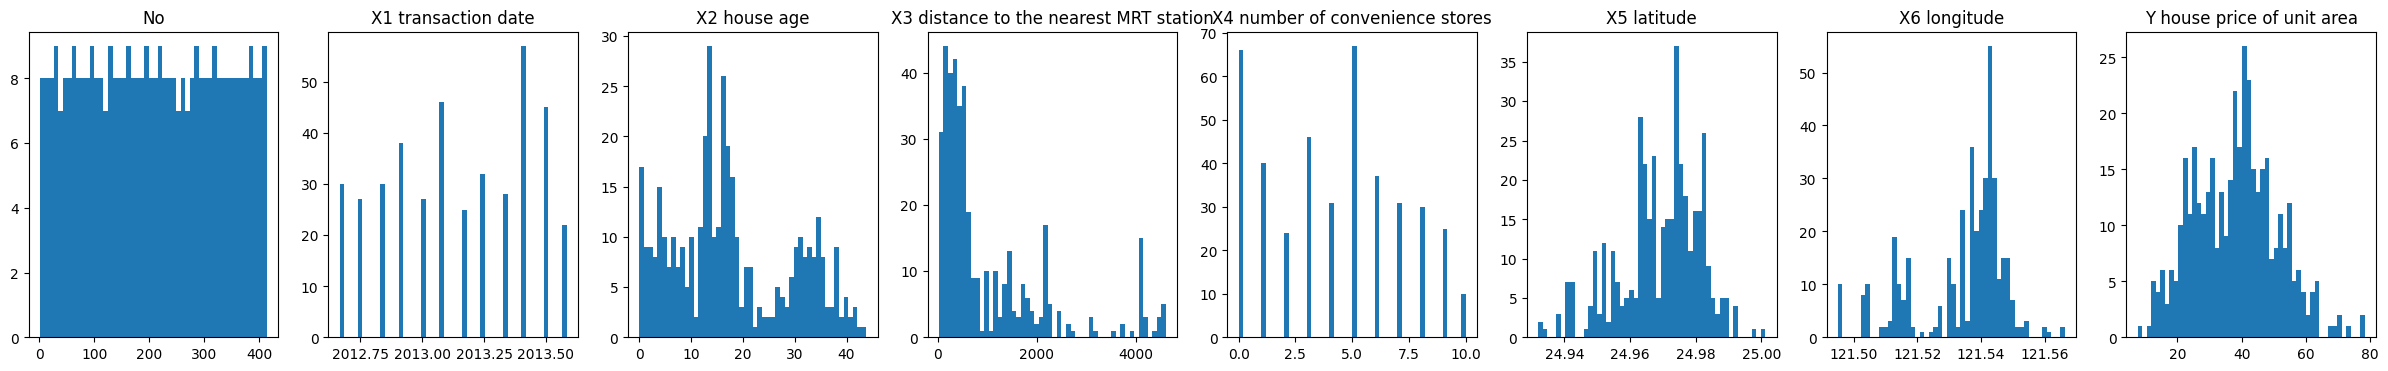

In [54]:
fig, axs = plt.subplots(1, len(df.columns), figsize=(24, 4))
for i in range(0, len(df.columns)):
    column = df.columns[i]
    axs[i].hist(df[column], bins=50)
    axs[i].set_title(column)

plt.tight_layout()
plt.show()

In [56]:
for column in df.columns:
    result = stats.anderson(df[column])
    if result.statistic < result.critical_values[2]:
        print(f'Распределение в столбце {column} является нормальным')

Распределение в столбце Y house price of unit area является нормальным
